In [94]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
load_dotenv()

import matplotlib.pyplot as plt
import seaborn as sns

import asyncio
from telegram import Bot
import nest_asyncio

In [30]:
import datetime
today = datetime.date.today()
print(today)

2024-01-27


## Read csv - investigate data
fetch data and store in folder before running below codes. run command in terminal : "python fetch_data_latest_commit.py"

#### Category 1: Donations at **State**

In [2]:
file_path = './data-darah-public/donations_state.csv'
df_donations_state = pd.read_csv(file_path)
df_donations_state.head(3)

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,525,0,0,0,496,18,11,243,277,5
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,217,6,4,0,224,2,1,83,143,1
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,89,10,13,0,105,2,5,8,101,3


In [3]:
file_path = './data-darah-public/newdonors_state.csv'
df_newdonors_state = pd.read_csv(file_path)
df_newdonors_state.head(3)

,date,state,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Malaysia,124,31,31,18,24,7,5,2,1,0,243
1,2006-01-02,Malaysia,16,15,11,8,19,6,6,2,0,0,83
2,2006-01-03,Malaysia,1,2,1,2,1,0,0,1,0,0,8


#### Category 2: Donations at **Facility**

In [4]:
file_path = './data-darah-public/donations_facility.csv'
df_donations_facility = pd.read_csv(file_path)
df_donations_facility.head(3)

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0


In [5]:
file_path = './data-darah-public/newdonors_facility.csv'
df_newdonors_facility = pd.read_csv(file_path)
df_newdonors_facility.head(3)

,date,hospital,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Hospital Sultanah Nora Ismail,21,2,2,3,6,1,0,0,1,0,36
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,0,0,0,1,0,0,0,0,0,0,1


### check nulls & data types

In [6]:
def check_ifNull(df, df_name):
    print(f"====Dataset: {df_name}=====")
    print("Missing Values:")
    print(df.isnull().sum())

check_ifNull(df_donations_state, "df_donations_state")
check_ifNull(df_newdonors_state, "df_newdonors_state")
check_ifNull(df_donations_facility, "df_donations_facility")
check_ifNull(df_newdonors_facility, "df_newdonors_facility")

====Dataset: df_donations_state=====
Missing Values:
date                       0
state                      0
daily                      0
blood_a                    0
blood_b                    0
blood_o                    0
blood_ab                   0
location_centre            0
location_mobile            0
type_wholeblood            0
type_apheresis_platelet    0
type_apheresis_plasma      0
type_other                 0
social_civilian            0
social_student             0
social_policearmy          0
donations_new              0
donations_regular          0
donations_irregular        0
dtype: int64
====Dataset: df_newdonors_state=====
Missing Values:
date     0
state    0
17-24    0
25-29    0
30-34    0
35-39    0
40-44    0
45-49    0
50-54    0
55-59    0
60-64    0
other    0
total    0
dtype: int64
====Dataset: df_donations_facility=====
Missing Values:
date                       0
hospital                   0
daily                      0
blood_a                    0
bl

- no missing valuee

In [7]:
def check_data_types(dataset, dataset_name):
    print(f"====Dataset: {dataset_name}====")
    # Check data types
    print("Data Types:")
    print(dataset.dtypes)
    print("\n")

check_data_types(df_donations_state, "df_donations_state")
check_data_types(df_newdonors_state, "df_newdonors_state")
check_data_types(df_donations_facility, "df_donations_facility")
check_data_types(df_newdonors_facility, "df_newdonors_facility")

====Dataset: df_donations_state====
Data Types:
date                       object
state                      object
daily                       int64
blood_a                     int64
blood_b                     int64
blood_o                     int64
blood_ab                    int64
location_centre             int64
location_mobile             int64
type_wholeblood             int64
type_apheresis_platelet     int64
type_apheresis_plasma       int64
type_other                  int64
social_civilian             int64
social_student              int64
social_policearmy           int64
donations_new               int64
donations_regular           int64
donations_irregular         int64
dtype: object


====Dataset: df_newdonors_state====
Data Types:
date     object
state    object
17-24     int64
25-29     int64
30-34     int64
35-39     int64
40-44     int64
45-49     int64
50-54     int64
55-59     int64
60-64     int64
other     int64
total     int64
dtype: object


====Dataset: df_do

- overall, data types; object, int64 only
- have to change the 'date' to datetime type

#### Observe value uniqueness
- how many states in the data?
- how many facilities in the data?

In [11]:
def find_unique_values(file_path, column_name):
    try:
        df = pd.read_csv(file_path)

        if column_name not in df.columns:
            return f"Column '{column_name}' not found in the CSV file."

        unique_values = df[column_name].unique()

        return unique_values

    except FileNotFoundError:
        return f"File not found: {file_path}"
    except Exception as e:
        return f"An error occurred: {e}"

##### How many unique states?

In [9]:
file_path = './data-darah-public/donations_state.csv'
column_name = 'state'
print(find_unique_values(file_path, column_name))

['Malaysia' 'Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


In [10]:
file_path = './data-darah-public/newdonors_state.csv'
column_name = 'state'
print(find_unique_values(file_path, column_name))

['Malaysia' 'Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


##### How many unique hospitals?

In [11]:
file_path = './data-darah-public/donations_facility.csv'
column_name = 'hospital'
print(find_unique_values(file_path, column_name))

['Hospital Sultanah Nora Ismail' 'Hospital Sultanah Aminah'
 'Hospital Sultanah Bahiyah' 'Hospital Raja Perempuan Zainab II'
 'Hospital Melaka' 'Hospital Tuanku Jaafar' 'Hospital Tengku Ampuan Afzan'
 'Hospital Sultan Haji Ahmad Shah' 'Hospital Seberang Jaya'
 'Hospital Pulau Pinang' 'Hospital Raja Permaisuri Bainun'
 'Hospital Taiping' 'Hospital Seri Manjung'
 'Hospital Tengku Ampuan Rahimah' 'Hospital Sultanah Nur Zahirah'
 'Hospital Queen Elizabeth II' 'Hospital Duchess Of Kent' 'Hospital Tawau'
 'Hospital Umum Sarawak' 'Hospital Miri' 'Hospital Sibu'
 'Pusat Darah Negara']


In [12]:
file_path = './data-darah-public/newdonors_facility.csv'
column_name = 'hospital'
print(find_unique_values(file_path, column_name))

['Hospital Sultanah Nora Ismail' 'Hospital Sultanah Aminah'
 'Hospital Sultanah Bahiyah' 'Hospital Raja Perempuan Zainab II'
 'Hospital Melaka' 'Hospital Tuanku Jaafar' 'Hospital Tengku Ampuan Afzan'
 'Hospital Sultan Haji Ahmad Shah' 'Hospital Seberang Jaya'
 'Hospital Pulau Pinang' 'Hospital Raja Permaisuri Bainun'
 'Hospital Taiping' 'Hospital Seri Manjung'
 'Hospital Tengku Ampuan Rahimah' 'Hospital Sultanah Nur Zahirah'
 'Hospital Queen Elizabeth II' 'Hospital Duchess Of Kent' 'Hospital Tawau'
 'Hospital Umum Sarawak' 'Hospital Miri' 'Hospital Sibu'
 'Pusat Darah Negara']


# 1. Trends

##### What is the relationship between state="Malaysia" and the other states.

In [13]:
#Hypothesis: 'daily' if state=Malaysia is the total sum of all daily of state=all 

#filter to include rows where state != 'Malaysia' and date = '2024-01-01'
filtered_df_statenotMalaysia = df_donations_state[(df_donations_state['state'] != 'Malaysia') & (df_donations_state['date'] == '2024-01-01')]
total_donations = filtered_df_statenotMalaysia['daily'].sum()
print("Total donations on 2024-01-01 (excluding state='Malaysia'): ", total_donations)

#filter to include rows where state = 'Malaysia' and date = '2024-01-01'
filtered_df_stateMalaysia = df_donations_state[(df_donations_state['state'] == 'Malaysia') & (df_donations_state['date'] == '2024-01-01')]
total_donations_Malaysia = filtered_df_stateMalaysia['daily'].sum()
print("Total donations on 2024-01-01 (state='Malaysia'): ", total_donations_Malaysia)
#This indicate the 'Malaysia' "state", matched the combined total of daily blood donation of other states.

Total donations on 2024-01-01 (excluding state='Malaysia'):  2258
Total donations on 2024-01-01 (state='Malaysia'):  2258


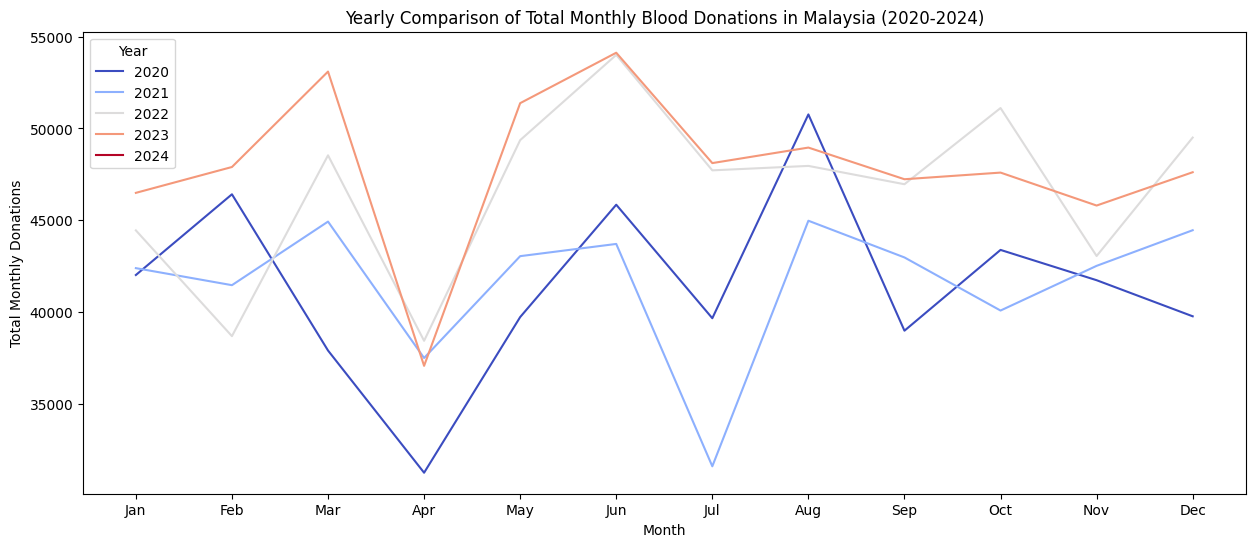

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_blood_donation_trends(df, start_year, end_year):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month

    #filter
    filtered_df = df[(df['year'] >= start_year) & (df['year'] <= end_year) & (df_donations_state['state'] == 'Malaysia')] 

    monthly_donations = filtered_df.groupby(['year', 'month'])['daily'].sum().reset_index()

    plt.figure(figsize=(15, 6))
    sns.lineplot(x='month', y='daily', hue='year', data=monthly_donations, palette='coolwarm')
    plt.title(f'Yearly Comparison of Total Monthly Blood Donations in Malaysia ({start_year}-{end_year})')
    plt.xlabel('Month')
    plt.ylabel('Total Monthly Donations')

    plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    plt.legend(title='Year')
    plt.show()

df_donations_state = pd.read_csv('./data-darah-public/donations_state.csv')
plot_blood_donation_trends(df_donations_state, 2020, 2024)


- line plot for 2024 is not seen because as of today, its Jan 2024. so not enough data to show the whole year.

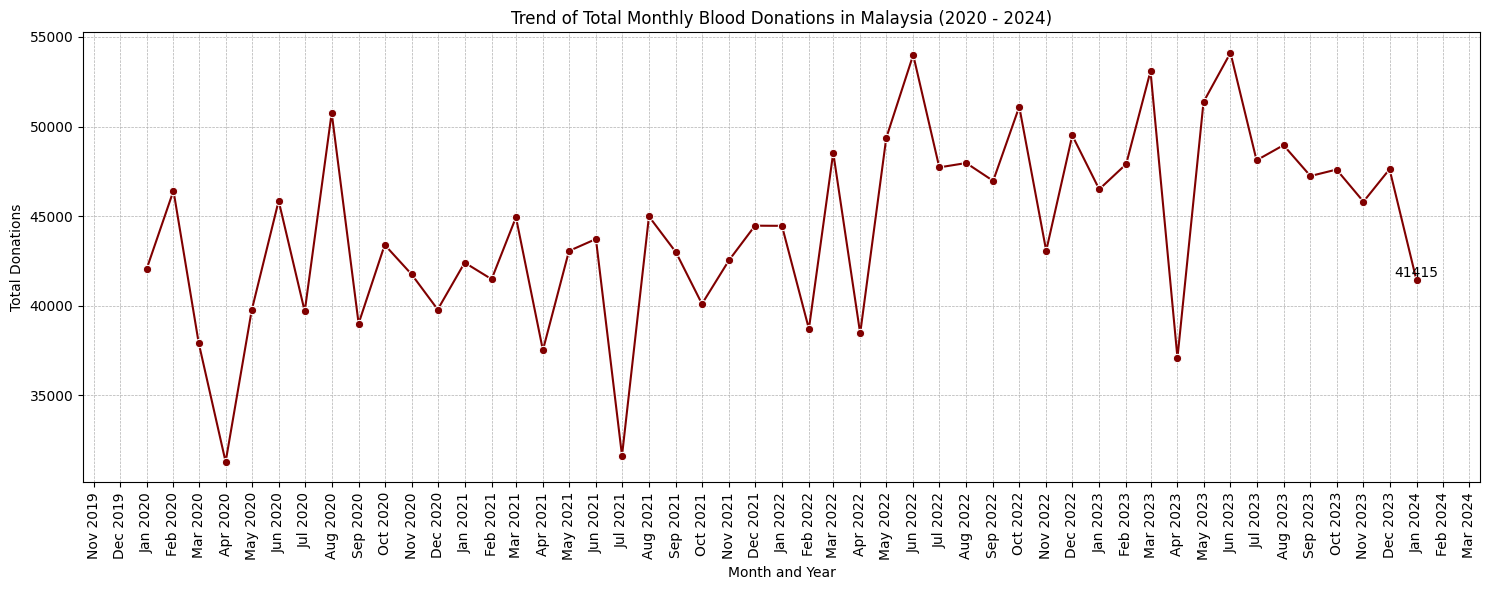

In [134]:
#pip install seaborn
#pip install matplotlib
#pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

def plot_blood_donation_trends(df, start_year, end_year):
    df['date'] = pd.to_datetime(df['date'])
    
    # Filter data based on the specified years and for 'Malaysia' state
    filtered_df = df[(df['date'].dt.year >= start_year) & (df['date'].dt.year <= end_year) & (df['state'] == 'Malaysia')]

    # Group by month and sum up the daily donations
    monthly_total_donations = filtered_df.groupby([filtered_df['date'].dt.to_period('M')])['daily'].sum().reset_index()
    monthly_total_donations['date'] = monthly_total_donations['date'].dt.to_timestamp()
    monthly_total_donations.rename(columns={'daily': 'total_donations'}, inplace=True)

    plt.figure(figsize=(15, 6))
    sns.lineplot(x='date', y='total_donations', data=monthly_total_donations, color='maroon', marker='o')
    plt.title(f'Trend of Total Monthly Blood Donations in Malaysia ({start_year} - {end_year})')
    plt.xlabel('Month and Year')
    plt.ylabel('Total Donations')

    # Format x-axis to show 'Month Year'
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=90)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Annotate only the most recent data point
    if not monthly_total_donations.empty:
        last_row = monthly_total_donations.iloc[-1]
        plt.text(last_row['date'], last_row['total_donations'], f"{last_row['total_donations']}", color='black', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_blood_donation_trends(df_donations_state, 2020, 2024)


#### What is the difference of total blood donations between each state? Which State contributes the most?

<Figure size 1500x1000 with 0 Axes>

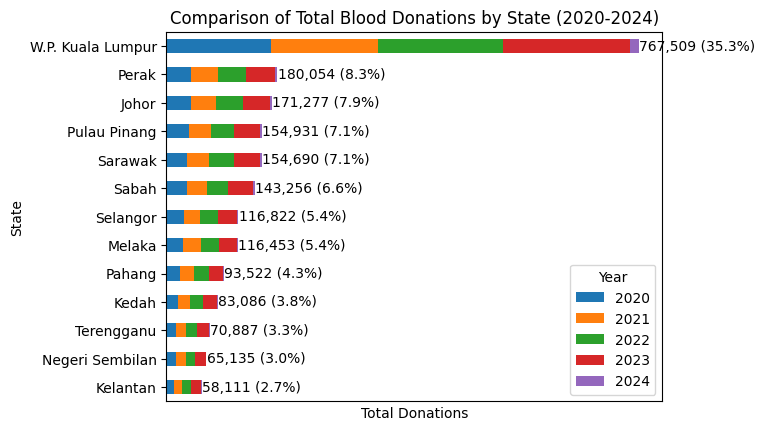

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_blood_donation_trends_by_state(df, start_year, end_year):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month

    filtered_df = df[(df['year'] >= start_year) & (df['year'] <= end_year) & (df['state'] != 'Malaysia')]

    yearly_donations = filtered_df.groupby(['state', 'year'])['daily'].sum().reset_index()

    #pivot the data to hv years as columns
    pivoted_df = yearly_donations.pivot(index='state', columns='year', values='daily').fillna(0)

    #sum of donations for each state
    total_donations_by_state = pivoted_df.sum(axis=1).sort_values(ascending=True)
    sorted_pivoted_df = pivoted_df.loc[total_donations_by_state.index]

    overall_total = total_donations_by_state.sum()

    plt.figure(figsize=(15, 10))
    ax = sorted_pivoted_df.plot(kind='barh', stacked=True)
    plt.title(f'Comparison of Total Blood Donations by State ({start_year}-{end_year})')
    plt.xlabel('Total Donations')
    plt.ylabel('State')

    ax.grid(axis='x', linestyle='--', alpha=0.7)

    for idx, state in enumerate(sorted_pivoted_df.index):
        total_donations = sorted_pivoted_df.loc[state].sum()
        percentage = (total_donations / overall_total) * 100
        plt.annotate(f'{total_donations:,.0f} ({percentage:.1f}%)', (total_donations + 500, idx), fontsize=10, va='center')

    #remove x-axis tick labels
    plt.xticks([])

    plt.legend(title='Year')
    plt.show()

plot_blood_donation_trends_by_state(df_donations_state, 2020, 2024)

### What is the blood donation count as of today?

In [218]:
import pandas as pd
from datetime import datetime

def get_donation_data(file_path):
    donations_df = pd.read_csv(file_path)
    
    donations_df['date'] = pd.to_datetime(donations_df['date'])

    #filter data for 'Malaysia' (to get total blood donations of whole Malaysia)
    malaysia_data = donations_df[donations_df['state'] == 'Malaysia']

    max_date = malaysia_data['date'].max()   #get the latest date available in the data

    latest_data = malaysia_data[malaysia_data['date'] == max_date] #filter only the latest (maximum) date

    #calculate the total number of donations for the latest date
    total_donations_latest_date = latest_data['daily'].sum()

    current_year = datetime.now().year

    current_year_data = malaysia_data[malaysia_data['date'].dt.year == current_year]

    total_donations_current_year = current_year_data['daily'].sum()

    return current_year, max_date, total_donations_latest_date, total_donations_current_year

file_path = './data-darah-public/donations_state.csv'

current_year, max_date, total_donations_latest_date, total_donations_current_year = get_donation_data(file_path)

#format date. if not, it will show timestamp
formatted_max_date = max_date.strftime('%Y-%m-%d')

print(f"Blood donations count on the latest date available: +{total_donations_latest_date}")
print(f"Total blood donations in Malaysia {current_year}: {total_donations_current_year}")
print(f"(data as of: {formatted_max_date})")


Blood donations count on the latest date available: +1733
Total blood donations in Malaysia 2024: 43148
(data as of: 2024-01-27)


#### What is the count of new Donors every year?  (using "newdonors_state.csv")
to find out 'new' donor
always remember to filter state='Malaysia' for the dataset. bcs if not, it will sum = 'Malaysia' (which is already the total) + 'all other states'

data as of: 2024-01-27


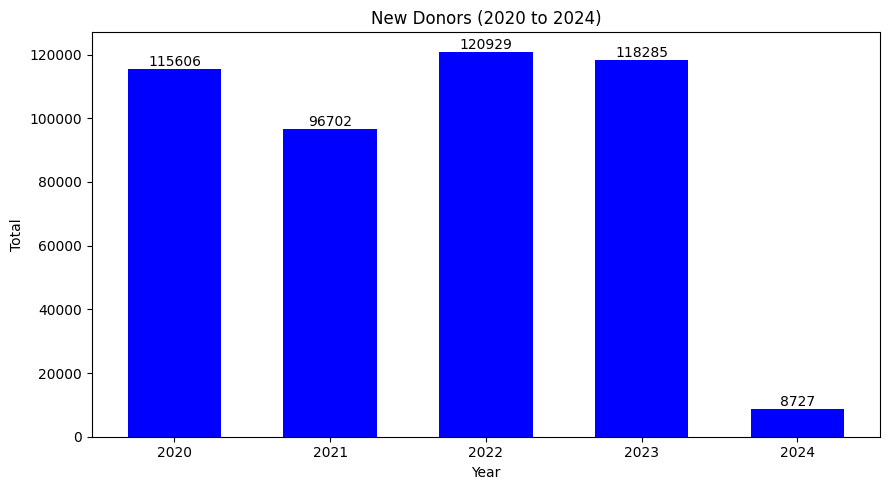

In [232]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def count_new_donors_by_year(start_year, end_year):
    new_donors_df = pd.read_csv("./data-darah-public/newdonors_state.csv")

    #filter the DataFrame to only include rows where the state is 'Malaysia'
    new_donors_df = new_donors_df[new_donors_df['state'] == 'Malaysia']

    new_donors_df['date'] = pd.to_datetime(new_donors_df['date'])
    latest_date = new_donors_df['date'].max()  #find the max (latest) date in the data
    print(f"data as of: {latest_date.strftime('%Y-%m-%d')}") 

    new_donors_df['total'] = pd.to_numeric(new_donors_df['total'], errors='coerce')
    new_donors_df['year'] = new_donors_df['date'].dt.year

    #group by year & sum the total new donors for each year
    annual_new_donors = new_donors_df[new_donors_df['year'].between(start_year, end_year)].groupby('year')['total'].sum()

    plt.figure(figsize=(9, 5))  # Adjust figure size as needed
    bars = plt.bar(annual_new_donors.index, annual_new_donors, color='blue', width=0.6)  
    plt.xlabel('Year')
    plt.ylabel('Total')

    plt.title(f'New Donors ({start_year} to {end_year})')
    plt.xticks(annual_new_donors.index, rotation=0)

    #annotate bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    return annual_new_donors

start_year = 2020
end_year = 2024

annual_new_donors_data = count_new_donors_by_year(start_year, end_year)


# 2. Blood Donor Retention Data (using granular data)

In [156]:
import pandas as pd
import requests
from io import BytesIO
import os
from urllib.parse import urlparse

def fetch_and_save_parquet_data():
    url = 'https://dub.sh/ds-data-granular'

    response = requests.get(url)

    if response.status_code == 200:
        parsed_url = urlparse(url)
        file_name = os.path.basename(parsed_url.path)

]       file_bytes = BytesIO(response.content)

        folder_name = 'data-granular'
        if not os.path.exists(folder_name):
            os.mkdir(folder_name)

        file_path = os.path.join(folder_name, file_name)
        with open(file_path, 'wb') as file:
            file.write(file_bytes.read())

        df = pd.read_parquet(file_path)

        return df
    else:
        raise Exception(f"Failed to fetch data: HTTP {response.status_code}")

In [157]:
fetch_and_save_parquet_data()

parquet_file = './data-granular/ds-data-granular'

donor_retention_data = pd.read_parquet(parquet_file)
donor_retention_data.head(5)

,donor_id,visit_date,birth_date
0,00000,2013-11-03,1964
1,00000,2014-05-26,1964
2,00000,2015-01-25,1964
3,00000,2015-08-09,1964
4,00000,2016-03-10,1964


## Approach 1: Retention period for different age group (not reliable)
retention rate method: calculates the difference in days between the first(max) and last(min) visit_date of each donor within each age group. It assumes that the length of time between a donor's first and last visit for retention. 
 - This is not a really good method bcs it might not fully capture engagement or consistent donation behavior over time. 
E.g a donor could visit once, then return and return again later which indicates he/she is a returning-donor.
Lets juz experiment.

In [158]:
from datetime import datetime

#convert date-related column to datetime type
donor_retention_data['visit_date'] = pd.to_datetime(donor_retention_data['visit_date'])
donor_retention_data['birth_date'] = pd.to_datetime(donor_retention_data['birth_date'], format='%Y')

#add new column: birth_year, visit_year
donor_retention_data['birth_year'] = donor_retention_data['birth_date'].dt.year
donor_retention_data['visit_year'] = donor_retention_data['visit_date'].dt.year

#add new column: first_donation (use the min date) & last (use the max date) 
retention_data = donor_retention_data.groupby('donor_id').agg(
    first_donation=pd.NamedAgg(column='visit_date', aggfunc='min'),
    last_donation=pd.NamedAgg(column='visit_date', aggfunc='max')
)

#add new column: years_active
retention_data['years_active'] = retention_data['last_donation'].dt.year - retention_data['first_donation'].dt.year
retention_data.head(5)

,first_donation,last_donation,years_active
donor_id,,,
00000,2013-11-03,2020-09-06,7
00001,2013-11-03,2020-03-05,7
00002,2013-11-03,2023-11-12,10
00003,2013-11-03,2022-08-07,9
00004,2012-01-01,2019-11-24,7


In [159]:
#add new column: first_year, last_year 
retention_data = donor_retention_data.groupby('donor_id').agg(
    first_year=pd.NamedAgg(column='visit_year', aggfunc='min'),
    last_year=pd.NamedAgg(column='visit_year', aggfunc='max')
)
retention_data.head(5)

,first_year,last_year
donor_id,,
00000,2013,2020
00001,2013,2020
00002,2013,2023
00003,2013,2022
00004,2012,2019


In [160]:
donor_first_year = donor_retention_data.groupby('donor_id')['visit_year'].min().reset_index()
new_donors_per_year = donor_first_year.groupby('visit_year').count()

donor_retention_data.sort_values(['donor_id', 'visit_date'], inplace=True)
donor_retention_data['previous_visit_date'] = donor_retention_data.groupby('donor_id')['visit_date'].shift(1)
donor_retention_data['days_between_visits'] = (donor_retention_data['visit_date'] - donor_retention_data['previous_visit_date']).dt.days

#calculate the age of the donor at the time of each visit
donor_retention_data['age_at_visit'] = donor_retention_data['visit_year'] - donor_retention_data['birth_year']
donor_retention_data.head(5)

,donor_id,visit_date,birth_date,birth_year,visit_year,previous_visit_date,days_between_visits,age_at_visit
0,00000,2013-11-03,1964-01-01,1964,2013,NaT,NaN,49
1,00000,2014-05-26,1964-01-01,1964,2014,2013-11-03,204.0,50
2,00000,2015-01-25,1964-01-01,1964,2015,2014-05-26,244.0,51
3,00000,2015-08-09,1964-01-01,1964,2015,2015-01-25,196.0,51
4,00000,2016-03-10,1964-01-01,1964,2016,2015-08-09,214.0,52


In [161]:
retention_preview = retention_data.head()
new_donors_preview = new_donors_per_year.head()
frequency_preview = donor_retention_data[['donor_id', 'visit_date', 'previous_visit_date', 'days_between_visits']].dropna().head()
age_preview = donor_retention_data[['donor_id', 'visit_date', 'age_at_visit']].head()

retention_preview, new_donors_preview, frequency_preview, age_preview

(          first_year  last_year
 donor_id                       
 00000           2013       2020
 00001           2013       2020
 00002           2013       2023
 00003           2013       2022
 00004           2012       2019,
             donor_id
 visit_year          
 2012          334793
 2013          229991
 2014          227629
 2015          220145
 2016          196828,
   donor_id visit_date previous_visit_date  days_between_visits
 1    00000 2014-05-26          2013-11-03                204.0
 2    00000 2015-01-25          2014-05-26                244.0
 3    00000 2015-08-09          2015-01-25                196.0
 4    00000 2016-03-10          2015-08-09                214.0
 5    00000 2016-08-14          2016-03-10                157.0,
   donor_id visit_date  age_at_visit
 0    00000 2013-11-03            49
 1    00000 2014-05-26            50
 2    00000 2015-01-25            51
 3    00000 2015-08-09            51
 4    00000 2016-03-10            52)

In [167]:
#age groups
bins = [17, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]
labels = ['17-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90+']

donor_retention_data['age_group'] = pd.cut(donor_retention_data['age_at_visit'], bins=bins, labels=labels, right=False)
donor_retention_data.head(10)

,donor_id,visit_date,birth_date,birth_year,visit_year,previous_visit_date,days_between_visits,age_at_visit,age_group
0,00000,2013-11-03,1964-01-01,1964,2013,NaT,NaN,49,45-49
1,00000,2014-05-26,1964-01-01,1964,2014,2013-11-03,204.0,50,50-54
2,00000,2015-01-25,1964-01-01,1964,2015,2014-05-26,244.0,51,50-54
3,00000,2015-08-09,1964-01-01,1964,2015,2015-01-25,196.0,51,50-54
4,00000,2016-03-10,1964-01-01,1964,2016,2015-08-09,214.0,52,50-54
5,00000,2016-08-14,1964-01-01,1964,2016,2016-03-10,157.0,52,50-54
6,00000,2016-12-19,1964-01-01,1964,2016,2016-08-14,127.0,52,50-54
7,00000,2017-04-20,1964-01-01,1964,2017,2016-12-19,122.0,53,50-54
8,00000,2018-03-19,1964-01-01,1964,2018,2017-04-20,333.0,54,50-54
9,00000,2018-12-31,1964-01-01,1964,2018,2018-03-19,287.0,54,50-54


In [168]:
# Group by age group and donor_id, then calculate the min and max visit dates for each donor in each group
age_group_retention = donor_retention_data.groupby(['age_group', 'donor_id'])['visit_date'].agg(['min', 'max'])

# Calculate the retention period for each donor in each age group
age_group_retention['retention_period'] = (age_group_retention['max'] - age_group_retention['min']).dt.days

# Average retention period by age group
average_retention_by_age_group = age_group_retention.groupby('age_group')['retention_period'].mean()

average_retention_by_age_group

/tmp/ipykernel_90633/411704467.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_retention = donor_retention_data.groupby(['age_group', 'donor_id'])['visit_date'].agg(['min', 'max'])
/tmp/ipykernel_90633/411704467.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_retention_by_age_group = age_group_retention.groupby('age_group')['retention_period'].mean()


age_group
17-24    301.017183
25-29    252.078128
30-34    285.167150
35-39    314.759992
40-44    339.727533
45-49    360.838147
50-54    370.786908
55-59    368.675378
60-64    203.497722
65-69    328.333333
70-74     80.228070
75-79     34.800000
80-84      6.000000
85-89     35.187500
90+       64.888889
Name: retention_period, dtype: float64

curious why age group 80+ has better retention period than others... 
i may find it not really intuitive to consider a certain age group has a better or worse retention of donating blood. 
need to consider the sample size and data quality when interpreting such results. Lets see the count of each age group.

#### Observe count of different age group in year 2023

In [169]:
donor_retention_data['age_in_2023'] = 2023 - donor_retention_data['birth_year']

donor_retention_data['age_group_2023'] = pd.cut(donor_retention_data['age_in_2023'], bins=bins, labels=labels, right=False)

# Count the number of people in each age group in the year 2023
age_group_counts_2023 = donor_retention_data[donor_retention_data['visit_year'] == 2023]['age_group_2023'].value_counts()

# Display the counts for each age group in 2023
print(age_group_counts_2023)

age_group_2023
17-24    98697
35-39    91951
30-34    88287
25-29    82182
40-44    80314
45-49    59880
50-54    43436
55-59    25688
60-64     4491
65-69      403
70-74       21
75-79        0
80-84        0
85-89        0
90+          0
Name: count, dtype: int64


not enough data to investigate abt the 80+ y/o.

## Approach 2: Retention rate 
- New Donor & Returning Donor 
retention rate method: this approach will capture no.of days it takes for the donor to return again(visit_date) after the previous_visit_date. // the days difference between visit_date and previous_visit_date. 
- investigate the status of the donor; whether he is 'new' or 'returning' donor.
- find the days_between_visits = 'visit_date' - 'previous_visit_date' (retention period)
- convert the 'days_between_visits' to 'year' format (to see better)
- find out : within 1 year, on average how many times the donor will return again? (find out for 2 year period too)


In [ ]:
import pandas as pd
import requests
from io import BytesIO

def fetch_parquet_data(url):
    """
    Fetches a Parquet file from a given URL and loads it into a Pandas DataFrame.

    Args:
    url (str): URL of the Parquet file.

    Returns:
    DataFrame: Pandas DataFrame containing the data from the Parquet file.
    """
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Read the content of the response in bytes
        file_bytes = BytesIO(response.content)

        # Use pandas to read the Parquet file
        df = pd.read_parquet(file_bytes)

        return df
    else:
        raise Exception(f"Failed to fetch data: HTTP {response.status_code}")

url = 'https://dub.sh/ds-data-granular'

# Fetch and print the DataFrame
try:
    dataframe = fetch_parquet_data(url)
    print(dataframe)
except Exception as e:
    print(e)


In [183]:
parquet_file = './data-granular/ds-data-granular'

data = pd.read_parquet(parquet_file)
data.head(5)

,donor_id,visit_date,birth_date
0,00000,2013-11-03,1964
1,00000,2014-05-26,1964
2,00000,2015-01-25,1964
3,00000,2015-08-09,1964
4,00000,2016-03-10,1964


In [233]:
data['visit_date'] = pd.to_datetime(data['visit_date'])

data['donation_year'] = data['visit_date'].dt.year

#find the first ever donation year for each donor
first_donation_year = data.groupby('donor_id')['donation_year'].min().reset_index()
first_donation_year.rename(columns={'donation_year': 'first_donation_year'}, inplace=True)

data_donor_status = pd.merge(data, first_donation_year, on='donor_id')

#donors status
data_donor_status['donor_status'] = 'Returning'
data_donor_status.loc[data_donor_status['donation_year'] == data_donor_status['first_donation_year'], 'donor_status'] = 'New'

data_donor_status.head(5)


,donor_id,visit_date,birth_date,donation_year,first_donation_year,donor_status
0,00000,2013-11-03,1964,2013,2013,New
1,00000,2014-05-26,1964,2014,2013,Returning
2,00000,2015-01-25,1964,2015,2013,Returning
3,00000,2015-08-09,1964,2015,2013,Returning
4,00000,2016-03-10,1964,2016,2013,Returning


In [234]:
#data.sort_values(['donor_id', 'visit_date'], inplace=True)
data_donor_status['previous_visit_date'] = data_donor_status.groupby('donor_id')['visit_date'].shift(1)
data_donor_status['days_between_visits'] = (data_donor_status['visit_date'] - data_donor_status['previous_visit_date']).dt.days

data_donor_status['age_at_visit'] = data_donor_status['donation_year'] - data_donor_status['birth_date']
data_donor_status.head(5)

,donor_id,visit_date,birth_date,donation_year,first_donation_year,donor_status,previous_visit_date,days_between_visits,age_at_visit
0,00000,2013-11-03,1964,2013,2013,New,NaT,NaN,49
1,00000,2014-05-26,1964,2014,2013,Returning,2013-11-03,204.0,50
2,00000,2015-01-25,1964,2015,2013,Returning,2014-05-26,244.0,51
3,00000,2015-08-09,1964,2015,2013,Returning,2015-01-25,196.0,51
4,00000,2016-03-10,1964,2016,2013,Returning,2015-08-09,214.0,52


### Returning Donor - return rate

In [188]:
returning_donors_copy = data_donor_status[data_donor_status['donor_status'] == 'Returning']
returning_donors_copy = returning_donors_copy.copy()

# Calculate the time difference in years from the first donation using .loc
returning_donors_copy.loc[:, 'years_since_first_donation'] = (returning_donors_copy['visit_date'] - pd.to_datetime(returning_donors_copy['previous_visit_date'], format='%Y')).dt.days / 365

# Determine if the return is within 1 and 2 years using .loc
returning_donors_copy.loc[:, 'return_within_1_year'] = returning_donors_copy['years_since_first_donation'] <= 1
returning_donors_copy.loc[:, 'return_within_2_years'] = returning_donors_copy['years_since_first_donation'] <= 2

# Recalculate returning rates
returns_within_1_year = returning_donors_copy['return_within_1_year'].sum()
returns_within_2_years = returning_donors_copy['return_within_2_years'].sum()

returning_rate_1_year = returns_within_1_year / total_unique_donors
returning_rate_2_years = returns_within_2_years / total_unique_donors

# Formatting the returning rates to 4 decimal points
returning_rate_1_year_formatted = "{:.2f}".format(returning_rate_1_year)
returning_rate_2_years_formatted = "{:.2f}".format(returning_rate_2_years)

returning_rate_1_year_formatted, returning_rate_2_years_formatted


('2.38', '3.04')

interpretation example:
~ 
A 1-year returning rate of 2.3822 means that within a year of their first donation, each donor returned to donate approximately 2.38 times, indicating a high level of engagement and frequent donations within the first year~ .
A 2-year returning rate of 3.0342 means that within two years of their first donation, each donor came back to donate about 3.03 times, showing sustained engagement over a longer period.

In [62]:
#returning_donors.to_csv('returning_donors.csv', index=False)

### i. What is the count of total donor every year?
Count the no.of donors every year. (we've done that in the 'Trends' section above but using different data).

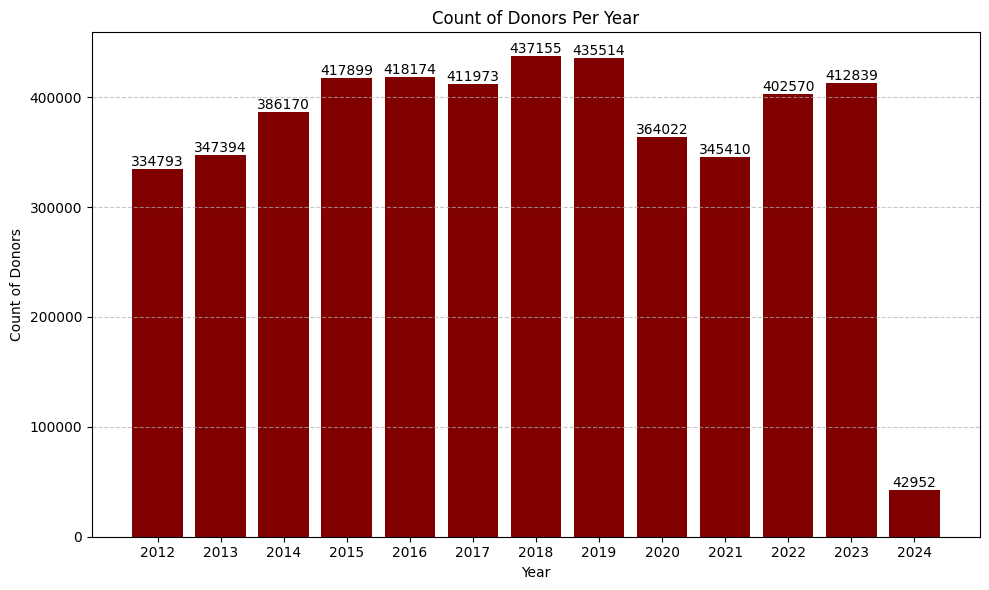

In [200]:
import matplotlib.pyplot as plt

def plot_donor_counts(data):
    donor_counts_per_year = data.groupby('donation_year')['donor_id'].nunique()

    plt.figure(figsize=(10, 6))
    bars = plt.bar(donor_counts_per_year.index.astype(str), donor_counts_per_year.values, color='maroon')

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')

    plt.title('Count of Donors Per Year')
    plt.xlabel('Year')
    plt.ylabel('Count of Donors')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_donor_counts(data)

### ii. What is the count of returning-donor every year?

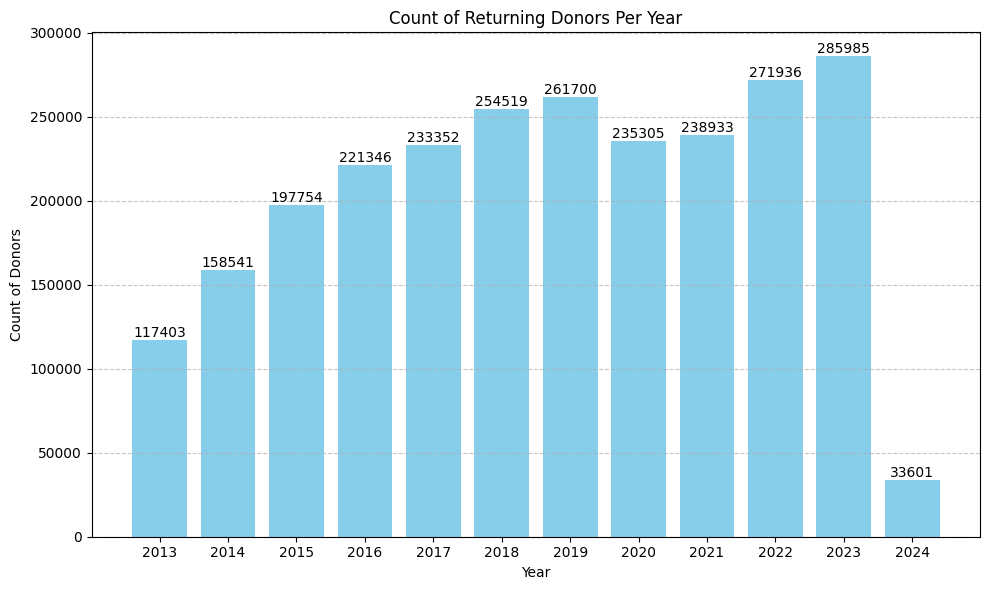

In [189]:
import matplotlib.pyplot as plt

def plot_returning_donor_counts(data):
    data['visit_date'] = pd.to_datetime(data['visit_date'])
    data['donation_year'] = data['visit_date'].dt.year

    first_donation_year = data.groupby('donor_id')['donation_year'].min().reset_index()
    first_donation_year.rename(columns={'donation_year': 'first_donation_year'}, inplace=True)

    data_donor_status = pd.merge(data, first_donation_year, on='donor_id')

    #mark 'new' donors in their first donation year
    data_donor_status['donor_status'] = 'Returning'
    data_donor_status.loc[data_donor_status['donation_year'] == data_donor_status['first_donation_year'], 'donor_status'] = 'New'

    returning_donors_copy = data_donor_status[data_donor_status['donor_status'] == 'Returning']    

    donor_counts_per_year = returning_donors_copy.groupby('donation_year')['donor_id'].nunique()

    plt.figure(figsize=(10, 6))
    bars = plt.bar(donor_counts_per_year.index.astype(str), donor_counts_per_year.values, color='skyblue')

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')

    plt.title('Count of Returning Donors Per Year')
    plt.xlabel('Year')
    plt.ylabel('Count of Donors')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_returning_donor_counts(data)

### iii. What is the count of returning-donor & new-donor every year?

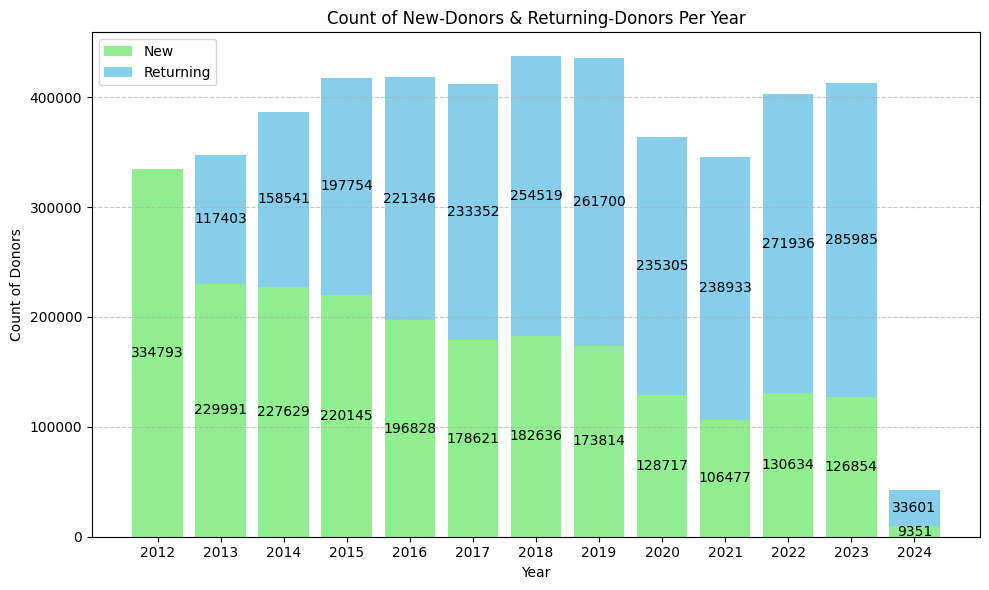

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_returning_new_donor_counts(data):
    data['visit_date'] = pd.to_datetime(data['visit_date'])
    data['donation_year'] = data['visit_date'].dt.year

    first_donation_year = data.groupby('donor_id')['donation_year'].min().reset_index()
    first_donation_year.rename(columns={'donation_year': 'first_donation_year'}, inplace=True)

    data_donor_status = pd.merge(data, first_donation_year, on='donor_id')

    #determine status; whether each donation was made by a 'New' or 'Returning' donor
    data_donor_status['donor_status'] = 'Returning'  # Assume 'Returning' by default
    #mark the first donation for each donor as 'New'
    data_donor_status.loc[data_donor_status['donation_year'] == data_donor_status['first_donation_year'], 'donor_status'] = 'New'

    #agregate count unique donors per year by status
    donor_counts_per_year = data_donor_status.groupby(['donation_year', 'donor_status'])['donor_id'].nunique().unstack(fill_value=0)

    plt.figure(figsize=(10, 6))

    # Create a stacked bar chart
    bars_new = plt.bar(donor_counts_per_year.index.astype(str), donor_counts_per_year['New'], color='lightgreen', label='New')
    bars_returning = plt.bar(donor_counts_per_year.index.astype(str), donor_counts_per_year['Returning'], bottom=donor_counts_per_year['New'], color='skyblue', label='Returning')

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars with counts
    for bars in [bars_new, bars_returning]:
        for bar in bars:
            yval = bar.get_height()
            if yval > 0:  # Only annotate non-zero bars
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + yval / 2, int(yval), ha='center', va='center')

    plt.title('Count of New-Donors & Returning-Donors Per Year')
    plt.xlabel('Year')
    plt.ylabel('Count of Donors')
    plt.xticks(rotation=0) 
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_returning_new_donor_counts(data)


### Which age group contributes more donation?

/tmp/ipykernel_90633/3971702527.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_year_counts = filtered_data.groupby(['age_group', 'donation_year'])['donor_id'].nunique().reset_index()


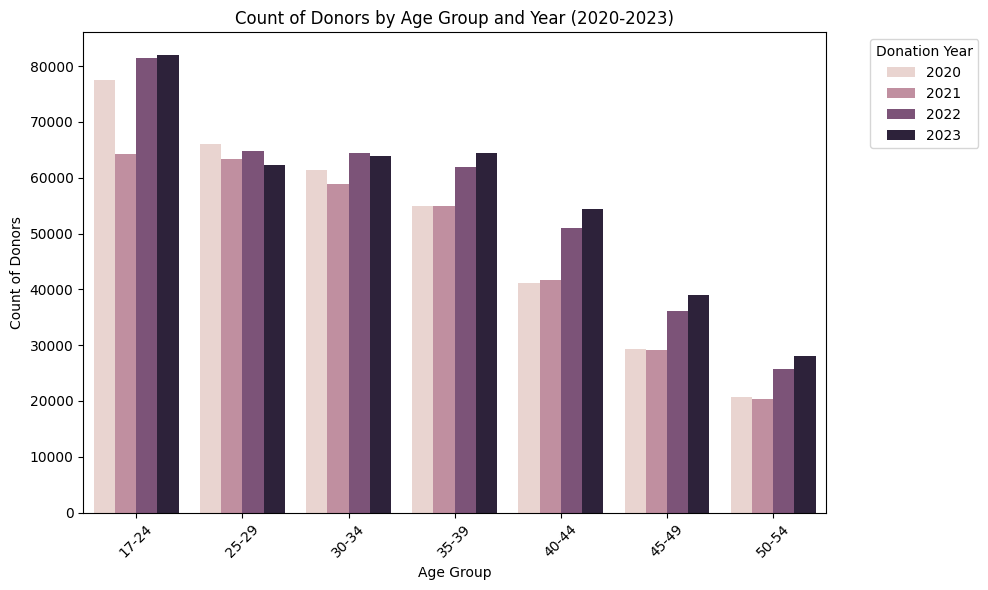

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_donor_counts_by_age_and_year(data, start_year=2020, end_year=2023):
    # Update bins and labels for age grouping
    bins = [17, 25, 30, 35, 40, 45, 50, 55]
    labels = ['17-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']

    # Categorize 'age_at_visit' into age groups
    data['age_group'] = pd.cut(data['age_at_visit'], bins=bins, labels=labels, right=False)

    # Filter data for the years between start_year and end_year
    filtered_data = data[data['donation_year'].between(start_year, end_year)]

    # Group by 'age_group' and 'donation_year' and count unique 'donor_id's
    age_group_year_counts = filtered_data.groupby(['age_group', 'donation_year'])['donor_id'].nunique().reset_index()

    # Filter age groups to only include '17-24' to '50-54'
    age_group_year_counts = age_group_year_counts[age_group_year_counts['age_group'].isin(labels)]

    # Create the plot with seaborn's barplot for better hue grouping
    plt.figure(figsize=(10, 6))
    sns.barplot(x='age_group', y='donor_id', hue='donation_year', data=age_group_year_counts) #

    # Set the title and labels
    plt.title(f'Count of Donors by Age Group and Year ({start_year}-{end_year})')
    plt.xlabel('Age Group')
    plt.ylabel('Count of Donors')
    plt.xticks(rotation=45)
    plt.legend(title='Donation Year', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

plot_donor_counts_by_age_and_year(data_donor_status)


=========== random ==================

## Returning Donor
The "return rate" in this context refers to the frequency with which blood donors return to donate blood again after their initial donation. It's a measure of donor retention and provides insights into how often donors come back to donate.

The "year" in this context means the number of years that have passed since a donor's first donation. For example:

- **Return rate 1 year:** This means the percentage of donors who return to donate blood within 1 year after their first donation.
- **Return rate 2 years:** This means the percentage of donors who return to donate blood within 2 years after their first donation.
- **Return rate 3 years:** This means the percentage of donors who return to donate blood within 3 years after their first donation.

These metrics are used to understand the donor retention rate over different time periods. A higher return rate indicates better donor retention, which is important for maintaining a stable and sustainable blood supply. Blood banks monitor these rates to assess the effectiveness of their donor retention strategies and to ensure an adequate supply of blood over time.

- **Return rate 1 year: 64.80%** means that approximately 64.80% of donors return to donate blood within 1 year after their first donation.
- **Return rate 2 years: 82.54%** means that approximately 82.54% of donors return to donate blood within 2 years after their first donation.
- **Return rate 3 years: 89.77%** means that approximately 89.77% of donors return to donate blood within 3 years after their first donation.
n.tion.

### Non-returning Donor?
A non-returning donor can be defined in terms of visits based on the specific criteria or definitions used by a blood donation organization or research study. Generally, a non-returning donor could be defined as someone who has made a single blood donation but has not returned for subsequent donations within a specified timeframe. The exact timeframe can vary but might typically be set based on the organization's donation frequency guidelines. For example:

For this study,
- definition: donor who does not visit again within 1-year period after their last donation (day gap between their last donation & the most recent date in the data is 1 year)

In [56]:
# Group by donor_id and count unique visit dates for each donor
donor_visits_count = data_donor_status.groupby('donor_id')['visit_date'].nunique()
donor_visits_count.head(10)

donor_id
00000    11
00001     4
00002    12
00003     5
00004     3
00005     9
00006     3
00007    15
00008     5
00009    19
Name: visit_date, dtype: int64

In [55]:
#find the most recent visit date in the dataset
most_recent_date = data_donor_status['visit_date'].max()
most_recent_date

Timestamp('2024-01-25 00:00:00')

In [53]:
#determine the last donation date for each donor
last_donation_date = data_donor_status.groupby('donor_id')['visit_date'].max()

#identify non-returning donors as those whose last donation was more than a year before the most recent date
non_returning_donors_within_1_year = last_donation_date[last_donation_date <= (most_recent_date - pd.Timedelta(days=365))].index

#get details of non-returning donors within the 1-year period
non_returning_donors_within_1_year_details = data_donor_status[data_donor_status['donor_id'].isin(non_returning_donors_within_1_year)]

non_returning_donors_within_1_year_details

,donor_id,visit_date,birth_date,donation_year,first_donation_year,donor_status,previous_visit_date,days_between_visits,age_at_visit
0,00000,2013-11-03,1964,2013,2013,New,NaT,NaN,49
1,00000,2014-05-26,1964,2014,2013,Returning,2013-11-03,204.0,50
2,00000,2015-01-25,1964,2015,2013,Returning,2014-05-26,244.0,51
3,00000,2015-08-09,1964,2015,2013,Returning,2015-01-25,196.0,51
4,00000,2016-03-10,1964,2016,2013,Returning,2015-08-09,214.0,52
...,...,...,...,...,...,...,...,...,...
6106345,08T6B,2023-01-25,2003,2023,2023,New,NaT,NaN,20
6106348,08T6D,2023-01-25,1982,2023,2023,New,NaT,NaN,41
6106349,08T6E,2023-01-25,1981,2023,2023,New,NaT,NaN,42
6106350,08T6F,2023-01-25,1989,2023,2023,New,NaT,NaN,34


In [71]:
#filter
filtered_donations = data_donor_status[data_donor_status['donor_id'].isin(non_returning_donors_within_1_year)]

#sort by donor_id & visit_date in descending order(to get the most recent donation at the top for each donor)
sorted_donations = filtered_donations.sort_values(by=['donor_id', 'visit_date'], ascending=[True, False])

#drop duplicates based on donor_id( to keep only the most recent record for each donor)
most_recent_donations_non_returning = sorted_donations.drop_duplicates(subset='donor_id')
most_recent_donations_non_returning.head(5)

,donor_id,visit_date,birth_date,donation_year,first_donation_year,donor_status,previous_visit_date,days_between_visits,age_at_visit
10,00000,2020-09-06,1964,2020,2013,Returning,2018-12-31,615.0,56
14,00001,2020-03-05,1983,2020,2013,Returning,2016-06-16,1358.0,37
31,00003,2022-08-07,1983,2022,2013,Returning,2020-10-04,672.0,39
34,00004,2019-11-24,1982,2019,2012,Returning,2017-01-15,1043.0,37
46,00006,2022-03-20,1992,2022,2012,Returning,2016-01-24,2247.0,30
